# 1. Análisis de datos

Comenzamos importando los módulos necesarios para el análisis de datos

In [ ]:
%pip install seaborn

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Creación e implementación del dataset

Ojo, el archivo 'marketing_campaign.csv' debe ser guardado en los archivos de colab cada vez que se abre el código, ya que este se guarda temporalmente.

En caso de haber guardado y el siguiente código da error, es porque se copió en una ruta de acceso diferente,
para solucionarlo se debe buscar donde se gaurdo el archivo y copiar la ruta de acceso para reemplazarlo en el siguiente código.


```
dataset= pd.read_csv('/RUTA DE ACCESO/marketing_campaign.csv', sep='\t')

dataset
```




In [ ]:
dataset= pd.read_csv('/content/marketing_campaign.csv', sep='\t')
dataset

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


Analizamos sus columnas

In [ ]:
dataset.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

## Investigación de campo y variables

Crearemos un grafico que contega los datos de cantidad de vino comprado en funcion de los ingresos

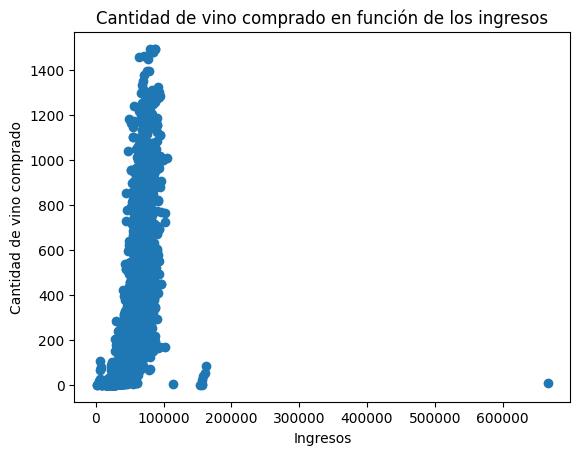

In [ ]:
plt.scatter(dataset['Income'], dataset['MntWines'])
plt.xlabel("Ingresos")
plt.ylabel("Cantidad de vino comprado")
plt.title("Cantidad de vino comprado en función de los ingresos")
plt.show()

Como se puede observar, hay pocos datos que se alejan extremadamente del conjunto principal de datos, lo que perjudica el análisis de éstos

Crearemos un gráfico de catnidad de vino comprado en función de los años de nacimiento

Text(0.5, 1.0, 'Cantidad de vino comprado en función de los años de nacimiento')

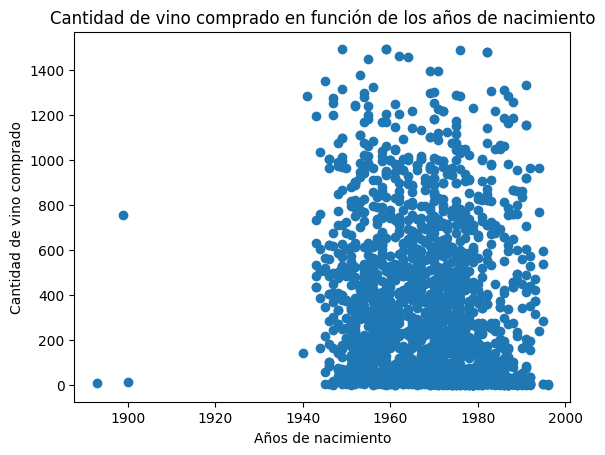

In [ ]:
plt.scatter(dataset['Year_Birth'], dataset['MntWines'])
plt.xlabel("Años de nacimiento")
plt.ylabel("Cantidad de vino comprado")
plt.title("Cantidad de vino comprado en función de los años de nacimiento")

Del mismo modo que el caso anterior, hay 3 datos que se alejan del connjunto medio

Crearemos un gráfico de la cantidad de vino comprada en funcion de la carne comprada

Text(0.5, 1.0, 'Cantidad de carne comprada en función del vino comprado')

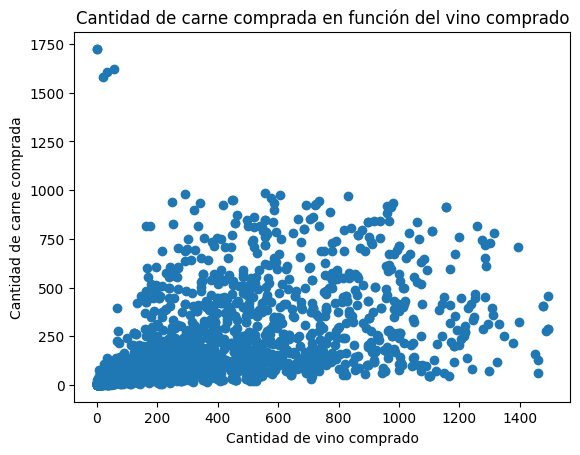

In [ ]:
plt.scatter(dataset['MntWines'], dataset['MntMeatProducts'])
plt.xlabel("Cantidad de vino comprado")
plt.ylabel("Cantidad de carne comprada")
plt.title("Cantidad de carne comprada en función del vino comprado")

#Limpieza y modificación de datos

##Eliminación de datos nulos

**Modificamos elementos del dataset**

Comenzaremos borrando columnas innecesarias para el análisis

In [ ]:
#Eliminamos las columnas 'ID' y 'Dt_Customer'
dataset.drop(columns=['ID','Dt_Customer'],inplace=True)

Creamos un mapa para ver los datos nulos en el dataset

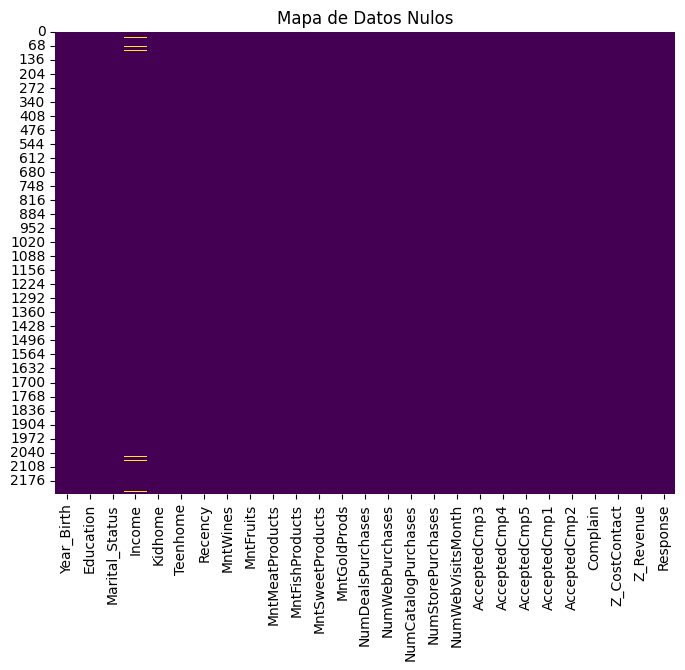

In [ ]:
null_map = dataset.isnull()

# Crear un mapa de calor con seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(null_map, cbar=False, cmap='viridis', cbar_kws={'label': 'Nulos'})
plt.title('Mapa de Datos Nulos')
plt.show()

Observamos que en la columna 'Income' hay un par de datos nulos, por lo que procederemos a eliminarlos

In [ ]:
#Eliminanmos los valores nulos de income con dropna
dataset.dropna(subset=['Income'], inplace=True)

Ahora observamos nuestro nuevo mapa de datos nulos


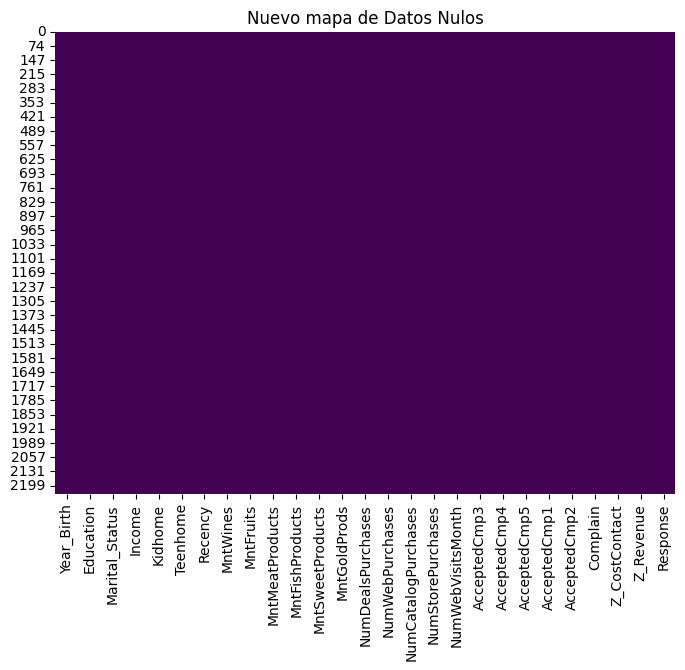

In [ ]:
null_map = dataset.isnull()

# Crear un mapa de calor con seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(null_map, cbar=False, cmap='viridis', cbar_kws={'label': 'Nulos'})
plt.title('Nuevo mapa de Datos Nulos')
plt.show()

## Modificación de variables numéricas

Filtramos los ingresos que sean sólo menores a 100000

In [ ]:
filtro_ingresos = dataset['Income'] < 100000
dataset = dataset[filtro_ingresos]

Fitramos las fechas de nacimiento sólo a mayores de 1940

In [ ]:
filtro_edades = dataset['Year_Birth'] > 1940
dataset = dataset[filtro_edades]

Cambiamos fechas de naciminento por edades y borramos la columna 'Year_Birth' cambiándola por 'Edades'

In [ ]:
def Edades(dataset):
  Año = dataset['Year_Birth']
  return 2024 - Año

dataset['Edades'] = Edades(dataset)

dataset.drop(columns=['Year_Birth'], inplace=True)

Unimos las columnas de Kidhome y Teenhome como la suma de ambos en 'N_hijos'

In [ ]:
def Hijostotal(dataset):
  Ninos = dataset['Kidhome']
  Jovenes = dataset['Teenhome']
  return Ninos + Jovenes

dataset['N_hijos'] = Hijostotal(dataset)
#Borramos las columnas 'Kidhome' y 'Teenhome'
dataset.drop(columns=['Kidhome', 'Teenhome'], inplace=True)

##Modificación de columnas de strings a valores numéricos

Modificamos la columna 'Education'

In [ ]:
dataset['Educacion'] = pd.Categorical(dataset['Education']).codes
#En Educacion, los valores quedan como
# 0 -> 2n Cycle
# 1 -> Basic
# 2 -> Graduation
# 3 -> Master
# 4 -> PhD

Modificamos la columna 'Marital_Status'

In [ ]:
#Primero eliminamos las filas que tengan como estado civil 'Alone', 'Absurd' y 'YOLO'
dataset = dataset[~dataset['Marital_Status'].isin(['Alone', 'Absurd', 'YOLO'])]

dataset['Estado_Civil'] = pd.Categorical(dataset['Marital_Status']).codes
#En Estado_Civil, los valores quedan como
# 0 -> Divorced
# 1 -> Married
# 2 -> Single
# 3 -> Together
# 4 -> Widow

<ipython-input-17-3e875c522c90>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['Estado_Civil'] = pd.Categorical(dataset['Marital_Status']).codes


#  Nuevo análisis de datos (*post modificación*)

##Relación con edades

Análisis de edades con histogramas para análisis de frecuencias de clientes

Text(0.5, 1.0, 'Histograma de Edades')

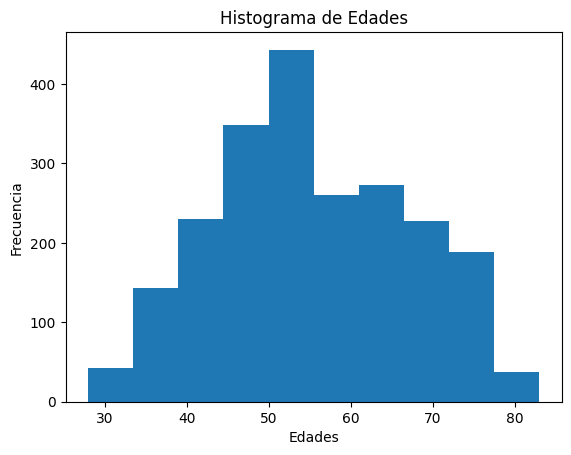

In [ ]:
plt.hist(dataset['Edades'])
plt.xlabel("Edades")
plt.ylabel("Frecuencia")
plt.title("Histograma de Edades")

Análisis de cantidad de vino comprado en función de las edades

Text(0, 0.5, 'Vino comprado')

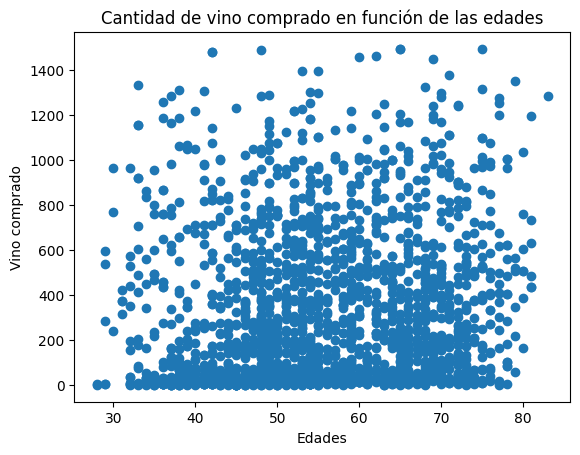

In [ ]:
plt.scatter(dataset['Edades'], dataset['MntWines'])
plt.title("Cantidad de vino comprado en función de las edades")
plt.xlabel('Edades')
plt.ylabel('Vino comprado')

##Relación con datos cualitativos

Ahora analizamos datos con dominios discretos y cualitativos

---



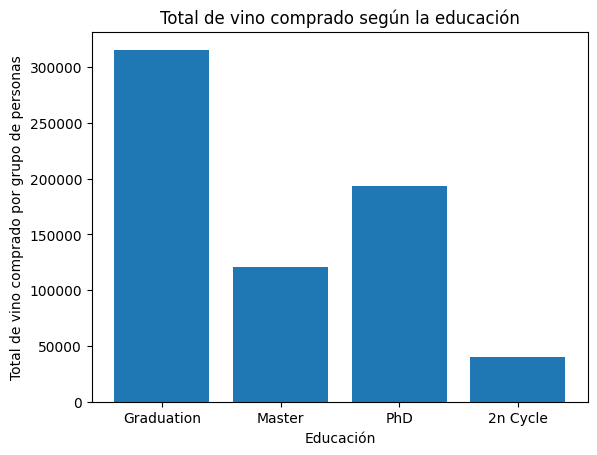

In [ ]:
Datos = np.transpose(np.array([dataset['Education'],dataset['MntWines']]))
Educaciones = np.array([['Graduation',0],['Master',0],['PhD',0],['2n Cycle',0]])
def EducacionXIngreso(Datos):
  a = 0
  for i in Educaciones:
    b = 0
    for j in Datos:
      if Datos[b][0] == Educaciones[a][0]:
        Educaciones[a][1] = int(Educaciones[a][1]) + int(Datos[b][1])
        Educaciones[a][1] = int(Educaciones[a][1])
        b = b +1
      else:
        b = b+1
    a = a+1

EducacionXIngreso(Datos)

Valores = list(Educaciones[ : , 1])
for i in range(len(Valores)):
  Valores[i] = int(Valores[i])
plt.bar(list(Educaciones[ : , 0]),Valores)
plt.title('Total de vino comprado según la educación')
plt.xlabel('Educación')
plt.ylabel('Total de vino comprado por grupo de personas')
plt.show()

Analizamos el estado civil de los individuos con la cantidad de vino que compran en total

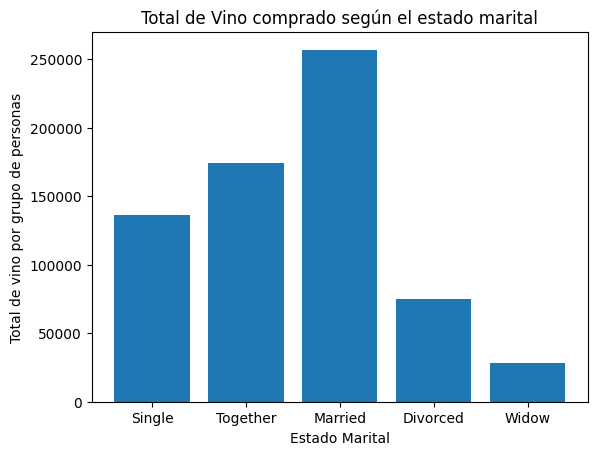

In [ ]:

Datos = np.transpose(np.array([dataset['Marital_Status'],dataset['MntWines']]))
Estados = np.array([['Single',0],['Together',0],['Married',0],['Divorced',0],['Widow',0]])
def EstadoXIngreso(Datos):
  a = 0
  for i in Estados:
    b = 0
    for j in Datos:
      if Datos[b][0] == Estados[a][0]:
        Estados[a][1] = int(Estados[a][1]) + int(Datos[b][1])
        b = b +1
      else:
        b = b+1
    a = a+1

EstadoXIngreso(Datos)
Valores = list(Estados[ : , 1])
for i in range(len(Valores)):
  Valores[i] = int(Valores[i])

plt.bar(Estados[ : , 0],Valores)
plt.title('Total de Vino comprado según el estado marital')
plt.xlabel('Estado Marital')
plt.ylabel('Total de vino por grupo de personas')
plt.show()

##Relación con compra de otros productos

Relación entre compra de vino y compra de carne

Text(0, 0.5, 'Carne comprada')

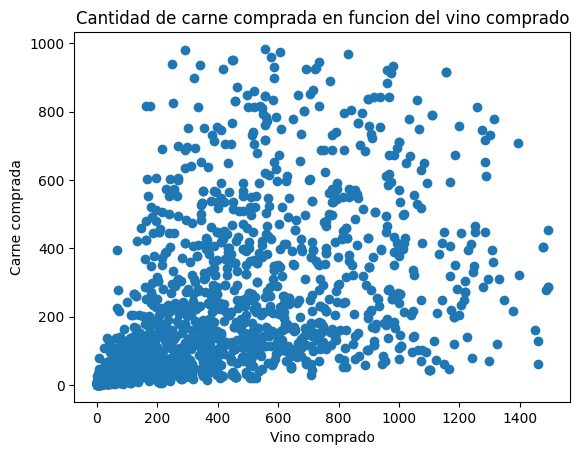

In [ ]:
#Eliminamos el valor de carne sobre 1500
dataset.drop(dataset[dataset['MntMeatProducts'] > 1500].index, inplace=True)

plt.scatter(dataset['MntWines'], dataset['MntMeatProducts'])
plt.title("Cantidad de carne comprada en funcion del vino comprado")
plt.xlabel('Vino comprado')
plt.ylabel('Carne comprada')

Relación entre compra de vino y compra de frutas

Text(0, 0.5, 'Frutas')

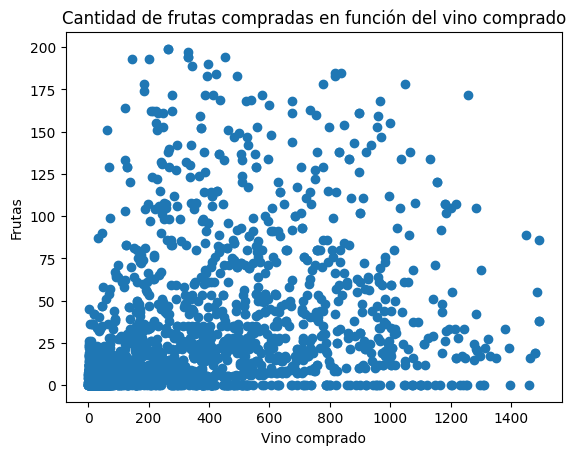

In [ ]:
plt.scatter(dataset['MntWines'], dataset['MntFruits'])
plt.title("Cantidad de frutas compradas en función del vino comprado")
plt.xlabel('Vino comprado')
plt.ylabel('Frutas')

Relación entre compra de vino y compra de pescado

Text(0, 0.5, 'Pescado comprado')

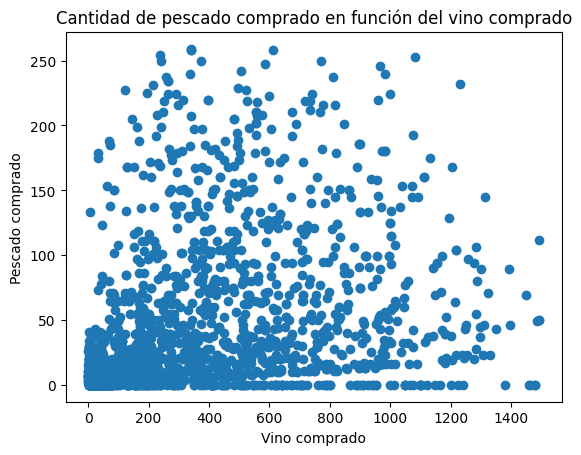

In [ ]:
plt.scatter(dataset['MntWines'], dataset['MntFishProducts'])
plt.title("Cantidad de pescado comprado en función del vino comprado")
plt.xlabel('Vino comprado')
plt.ylabel('Pescado comprado')

Relación entre compra de vino y compra de dulces

Text(0, 0.5, 'Dulces comprados')

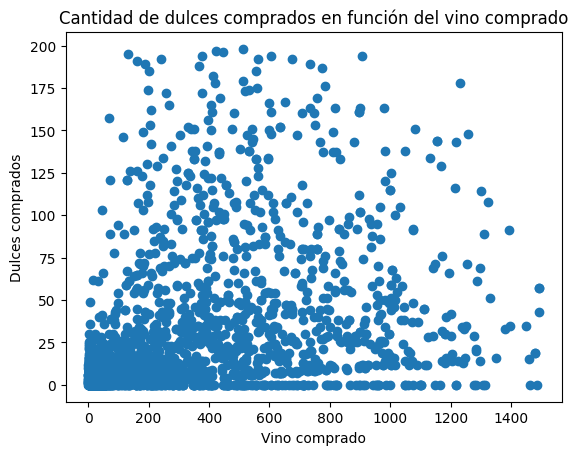

In [ ]:
plt.scatter(dataset['MntWines'], dataset['MntSweetProducts'])
plt.title("Cantidad de dulces comprados en función del vino comprado")
plt.xlabel('Vino comprado')
plt.ylabel('Dulces comprados')

Una vez finalizado el análisis, procedemos a eliminar las columnas con elementos tipo string

In [ ]:
dataset.drop(columns=['Education', 'Marital_Status'], inplace=True)

In [ ]:
#Así queda finalmente el dataset filtrado y modificado
dataset.head()

,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,...,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Edades,N_hijos,Educacion,Estado_Civil
0,58138.0,58,635,88,546,172,88,88,3,8,...,0,0,0,3,11,1,67,0,2,2
1,46344.0,38,11,1,6,2,1,6,2,1,...,0,0,0,3,11,0,70,2,2,2
2,71613.0,26,426,49,127,111,21,42,1,8,...,0,0,0,3,11,0,59,0,2,3
3,26646.0,26,11,4,20,10,3,5,2,2,...,0,0,0,3,11,0,40,1,2,3
4,58293.0,94,173,43,118,46,27,15,5,5,...,0,0,0,3,11,0,43,1,4,1


# Creación del primer modelo (*K Means*)

Importamos los módulos y creamos el modelo

In [ ]:
from sklearn.cluster import KMeans

Modificamos el dataset de pandas a numpy para aplicar el modelo

In [ ]:
dataset_np = dataset[['Income', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
       'Complain', 'Z_CostContact', 'Z_Revenue', 'Response', 'Edades',
       'N_hijos', 'Educacion', 'Estado_Civil']].to_numpy()

##Optimización del modelo

Antes de aplicar el modelo de K-Means, analicemos cual es el número de clusters óptimo, para aquello utilizaremos el método del codo

Text(0.5, 1.0, 'Método del Codo')

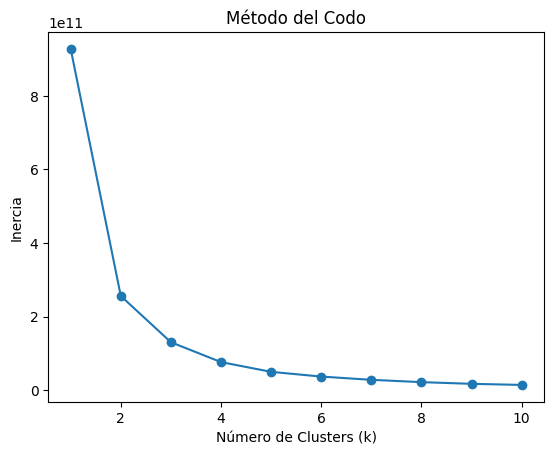

In [ ]:
#Método del codo
inercia = []
rangos_k = range(1, 11)  # Probar de k=1 a k=10

for k in rangos_k:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(dataset_np)
    inercia.append(kmeans.inertia_)

# Graficar la inercia vs el número de clusters
plt.plot(rangos_k, inercia, marker='o')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Inercia')
plt.title('Método del Codo')


Podemos observar que a partir del cluster número 6, la curva comienza a aplanarse, esto quiere decir que el número óptimo será 6

Nuestro modelo_1 tendrá un numero de clusters igual a 6, por lo que procederemos a crearlo

In [ ]:
modelo_1 = KMeans(n_clusters=6)

In [ ]:
modelo_1.fit(dataset_np)
labels = modelo_1.labels_
dataset['cluster'] = labels
#Se agregaron los centros en el dataset como una columna  'cluster'

##Análisis de los resultados del modelo

Para aquello, a pesar de ser varias variables, podemos tomar 2 para graficar y ver cómo se agruparon los elementos

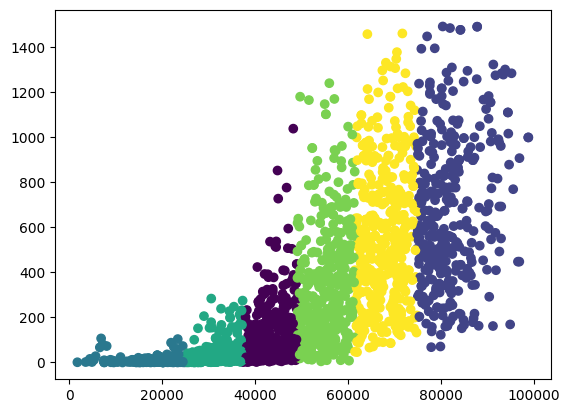

In [ ]:
plt.scatter(dataset['Income'], dataset['MntWines'], c=dataset['cluster'], cmap='viridis')
plt.show()

Como se puede observar, se tiene una tendencia a agruparse de forma vertical, por lo que procederemos a analizar los centroides individualmente y encontrar el que esté más relacionado con el mayor consumo de vino

In [ ]:
#Se mostrarán los 6 centros del modelo
modelo_1.cluster_centers_

array([[ 4.29543657e+04,  4.97468031e+01,  1.15583120e+02,
         8.06138107e+00,  4.66342711e+01,  1.35652174e+01,
         8.16624041e+00,  2.65140665e+01,  2.69053708e+00,
         3.28644501e+00,  1.09207161e+00,  4.11764706e+00,
         6.37084399e+00,  8.43989770e-02,  3.58056266e-02,
        -4.99600361e-16,  7.67263427e-03,  7.67263427e-03,
         2.04603581e-02,  3.00000000e+00,  1.10000000e+01,
         1.20204604e-01,  5.54757033e+01,  1.34015345e+00,
         2.52173913e+00,  1.78516624e+00],
       [ 8.19754171e+04,  4.99114286e+01,  6.76091429e+02,
         6.42485714e+01,  4.77551429e+02,  9.39114286e+01,
         6.75342857e+01,  7.13057143e+01,  1.20857143e+00,
         5.25142857e+00,  5.97428571e+00,  8.42857143e+00,
         2.70000000e+00,  9.42857143e-02,  1.60000000e-01,
         3.68571429e-01,  2.71428571e-01,  3.71428571e-02,
         5.71428571e-03,  3.00000000e+00,  1.10000000e+01,
         3.25714286e-01,  5.65085714e+01,  3.05714286e-01,
         2.43

Como podemos observar, ya que nuestra variable 'MntWines' es nuestra segunda coordenada en cada centro, entonces buscaremos el máximo de estos valores.


Por lo que se definirá como grupo objetivo de compra de vino y de estudio de características, donde tosdos los clientes que pertenezcan al cluster (Max_consumo_vino) se considerarán que si compran vino

In [ ]:
# Encontramos el cluster con la coordenada 2 mas grande (Mayor consumo de vino)
Max_consumo_vino = np.argmax(modelo_1.cluster_centers_[:, 2])
Max_consumo_vino

1

In [ ]:
#Definimos una columna que contenga la información de que el cliente pertenece o no al cluster 3
#Para aquello se define
# 1 -> Si pertenece
# 0 -> No pertenece

data = pd.get_dummies(dataset.cluster, dummy_na = True, dtype = int)
dataset['Compra Vino'] = data[Max_consumo_vino]
dataset

,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,...,Complain,Z_CostContact,Z_Revenue,Response,Edades,N_hijos,Educacion,Estado_Civil,cluster,Compra Vino
0,58138.0,58,635,88,546,172,88,88,3,8,...,0,3,11,1,67,0,2,2,4,0
1,46344.0,38,11,1,6,2,1,6,2,1,...,0,3,11,0,70,2,2,2,0,0
2,71613.0,26,426,49,127,111,21,42,1,8,...,0,3,11,0,59,0,2,3,5,0
3,26646.0,26,11,4,20,10,3,5,2,2,...,0,3,11,0,40,1,2,3,3,0
4,58293.0,94,173,43,118,46,27,15,5,5,...,0,3,11,0,43,1,4,1,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,61223.0,46,709,43,182,42,118,247,2,9,...,0,3,11,0,57,1,2,1,4,0
2236,64014.0,56,406,0,30,0,0,8,7,8,...,0,3,11,0,78,3,4,3,5,0
2237,56981.0,91,908,48,217,32,12,24,1,2,...,0,3,11,0,43,0,2,0,4,0
2238,69245.0,8,428,30,214,80,30,61,2,6,...,0,3,11,0,68,1,3,3,5,0


#Creación del segundo modelo (*KNN*)

Ahora, trabajaremos con el modelo de k vecinos más cercanos para predecir si un cliente compra o no vino a partir de su perfil

Definimos 'y' como la variable a predecir y 'X' como los datos para entrenar

In [ ]:
y = dataset['Compra Vino']
X = dataset.drop('Compra Vino', axis = 1)

Importamos el módulo del modelo

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier


Creamos los subgrupos 'X' e 'y' de entrenamiento y de pruebas (para testear el modelo)

In [ ]:
#Los datos de entrenamiento serán un 70% del dataset, mientras de los de prueba serán un 30%

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.3 , random_state=11)

##Optimización del modelo

Para encontrar el número de vecinos óptimos, debemos utilizar el análisis de la tasa de error (el valor más aproximado a cero, es el número de vecinos más óptimo)

In [ ]:
tasa_error = []
for i in range(1,20):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    knn.predict(X_test)
    prediccion_i = knn.predict(X_test)
    tasa_error.append(np.mean(prediccion_i != y_test))

Text(0.5, 1.0, 'Tasa de error en función del número de vecinos')

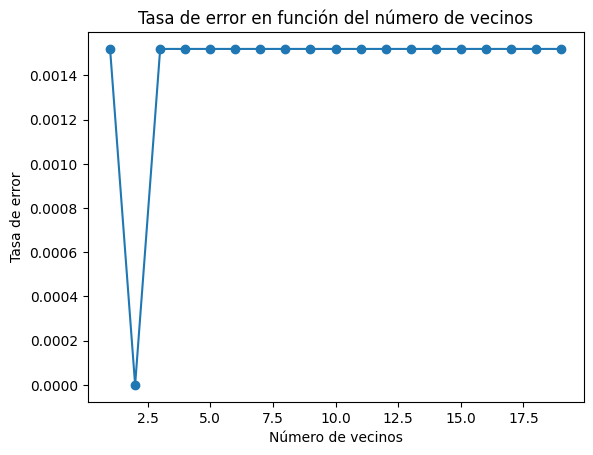

In [ ]:
#Graficamos la tasa de error
valores = range(1,20)
plt.plot(valores, tasa_error, marker='o')
plt.xlabel('Número de vecinos')
plt.ylabel('Tasa de error')
plt.title('Tasa de error en función del número de vecinos')

In [ ]:
# Tomaremos el primer valor de la tasa_error que sea 0 o el minimo y devolveremos su indice de la lista
minimo_tasa_error = min(tasa_error)
Menor_tasa_error = tasa_error.index(minimo_tasa_error) + 1
Menor_tasa_error

2

Como podemos observar en el gráfico, se debe buscar el valor cuyo punto en la gráfica sea lo más cercano a cero (que tenga menor tasa de error)

In [ ]:
#Creamos el modelo
knn = KNeighborsClassifier(n_neighbors=Menor_tasa_error)

In [ ]:
#Entrenamos el modelo con los datos de entrenamiento
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=2)

In [ ]:
predicciones = knn.predict(X_test)
#De acá, el modelo predice si un cliente, respecto a sus características compra vino o no

##Análisis de los resultados del modelo

Una vez obtenidas las predicciones, podemos analizar la presición de los datos

Usaremos la matriz de confusión

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test,predicciones))

[[557   0]
 [  0 101]]


In [ ]:
#Para un análisis más en profundidad usamos el clasiffication report
print(classification_report(y_test,predicciones))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       557
           1       1.00      1.00      1.00       101

    accuracy                           1.00       658
   macro avg       1.00      1.00      1.00       658
weighted avg       1.00      1.00      1.00       658



De esta forma se puede concluir que la presición de este modelo es aproximadamente del 99%

# Análisis de resultados y conclusiones

##Conclusiones con radar chart (*K Means*)

Crearemos un radar chart para analizar la tendencia de los compradores de vino (cluster 3) segun sus características cualitativas

Empezaremos con el estado marital

In [ ]:
# Creamos una tabla de frecuencias de cada cluster
frecuencia_estado_civil = dataset.groupby(['cluster', 'Estado_Civil']).size().unstack(fill_value=0)
tabla_frecuencia_df = frecuencia_estado_civil.reset_index()

#Cambiamos los valores numericos a características cualitativas, en este caso el estado marital
new_column_names = {0: 'Divorced', 1: 'Married', 2: 'Single', 3: 'Together', 4: 'Widow'}
for old_name, new_name in new_column_names.items():
  if old_name in tabla_frecuencia_df.columns:
    tabla_frecuencia_df = tabla_frecuencia_df.rename(columns={old_name: new_name})
  else:
    pass

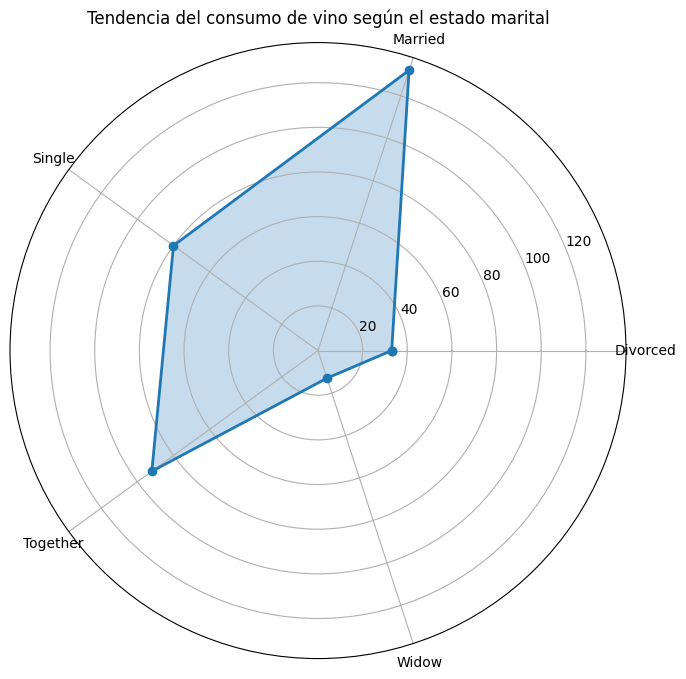

In [ ]:
#Creamos el radar chart para el cluster seleccionado

def radar_chart(df, cluster_num):
    # Select data for the specified cluster
    cluster_data = df[df['cluster'] == cluster_num]

    # Prepare data for the radar chart
    categories = list(cluster_data.columns[1:])  # Exclude 'cluster' column
    values = cluster_data.iloc[0, 1:].values.flatten().tolist() # Get values for the cluster

    # Number of variables
    N = len(categories)

    # Create angles for the radar chart
    angles = [n / float(N) * 2 * 3.14159 for n in range(N)]
    angles += angles[:1]

    # Initialize the plot
    plt.figure(figsize=(8, 8))
    ax = plt.subplot(111, polar=True)

    # Plot data
    ax.plot(angles, values + values[:1], 'o-', linewidth=2)
    ax.fill(angles, values + values[:1], alpha=0.25)

    # Set labels and ticks
    ax.set_thetagrids(np.degrees(angles[:-1]), categories)
    plt.title(f'Tendencia del consumo de vino según el estado marital')

    plt.show()

radar_chart(tabla_frecuencia_df, Max_consumo_vino)

Ahora, creamos un radar chart respecto a la educación

In [ ]:
# Creamos una tabla de frecuencias de cada cluster
frecuencia_educacion = dataset.groupby(['cluster', 'Educacion']).size().unstack(fill_value=0)
tabla_frecuencia_df = frecuencia_educacion.reset_index()

#Cambiamos los valores numericos a características cualitativas, en este caso la educación
new_column_names = {0: '2n Cycle', 1: 'Basic', 2: 'Graduation', 3: 'Master', 4: 'PhD'}
for old_name, new_name in new_column_names.items():
  if old_name in tabla_frecuencia_df.columns:
    tabla_frecuencia_df = tabla_frecuencia_df.rename(columns={old_name: new_name})
  else:
    pass

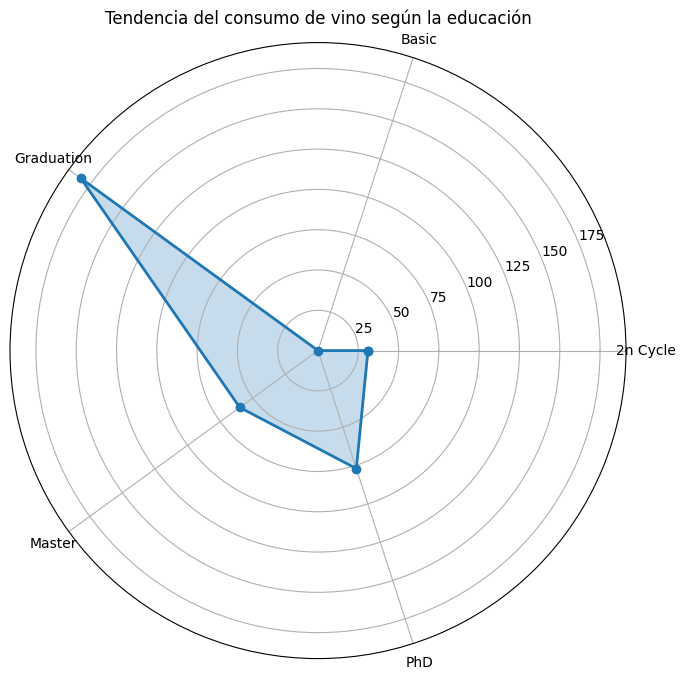

In [ ]:
#Creamos el radar chart para el cluster 3

def radar_chart(df, cluster_num):
    # Select data for the specified cluster
    cluster_data = df[df['cluster'] == cluster_num]

    # Prepare data for the radar chart
    categories = list(cluster_data.columns[1:])  # Exclude 'cluster' column
    values = cluster_data.iloc[0, 1:].values.flatten().tolist() # Get values for the cluster

    # Number of variables
    N = len(categories)

    # Create angles for the radar chart
    angles = [n / float(N) * 2 * 3.14159 for n in range(N)]
    angles += angles[:1]

    # Initialize the plot
    plt.figure(figsize=(8, 8))
    ax = plt.subplot(111, polar=True)

    # Plot data
    ax.plot(angles, values + values[:1], 'o-', linewidth=2)
    ax.fill(angles, values + values[:1], alpha=0.25)

    # Set labels and ticks
    ax.set_thetagrids(np.degrees(angles[:-1]), categories)
    plt.title(f'Tendencia del consumo de vino según la educación')

    plt.show()

radar_chart(tabla_frecuencia_df, Max_consumo_vino)

Ahora creamos el radar chart para el número de hijos

In [ ]:
# Creamos una tabla de frecuencias por número de hijos de cada cluster
frecuencia_hijos = dataset.groupby(['cluster', 'N_hijos']).size().unstack(fill_value=0)
tabla_frecuencia_df = frecuencia_hijos.reset_index()

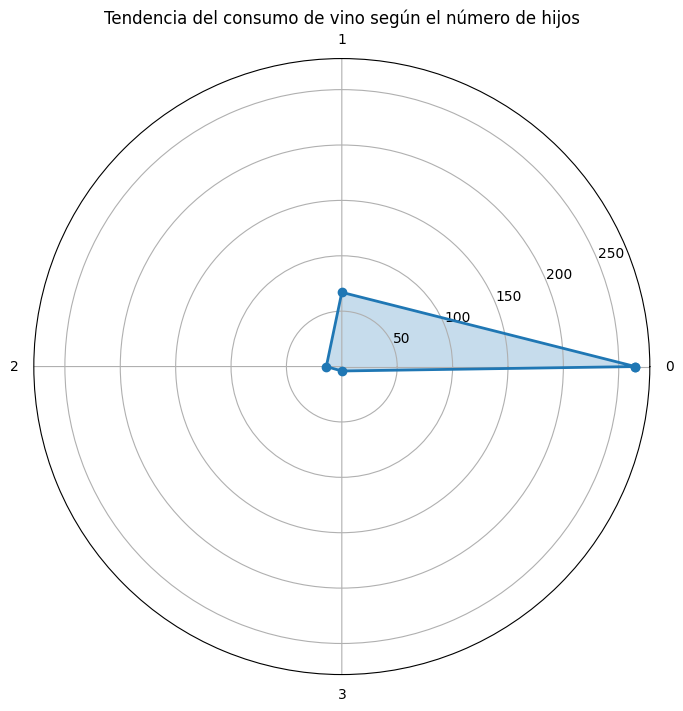

In [ ]:
#Creamos el radar chart para el cluster 3

def radar_chart(df, cluster_num):
    # Select data for the specified cluster
    cluster_data = df[df['cluster'] == cluster_num]

    # Prepare data for the radar chart
    categories = list(cluster_data.columns[1:])  # Exclude 'cluster' column
    values = cluster_data.iloc[0, 1:].values.flatten().tolist() # Get values for the cluster

    # Number of variables
    N = len(categories)

    # Create angles for the radar chart
    angles = [n / float(N) * 2 * 3.14159 for n in range(N)]
    angles += angles[:1]

    # Initialize the plot
    plt.figure(figsize=(8, 8))
    ax = plt.subplot(111, polar=True)

    # Plot data
    ax.plot(angles, values + values[:1], 'o-', linewidth=2)
    ax.fill(angles, values + values[:1], alpha=0.25)

    # Set labels and ticks
    ax.set_thetagrids(np.degrees(angles[:-1]), categories)
    plt.title(f'Tendencia del consumo de vino según el número de hijos')

    plt.show()

radar_chart(tabla_frecuencia_df, Max_consumo_vino)

Creamos un radar chart respecto al promedio de compras de otros productos en relacion a la compra de vino (cluster 3)

In [ ]:
#Creamos un dataframe con el promedio de MntFruits, MntMeatProducts, MntFishProducts, MntSweetProducts de cada cluster
cluster_means = dataset.groupby('cluster').agg({
    'MntFruits': 'mean',
    'MntMeatProducts': 'mean',
    'MntFishProducts': 'mean',
    'MntSweetProducts': 'mean'
}).reset_index()

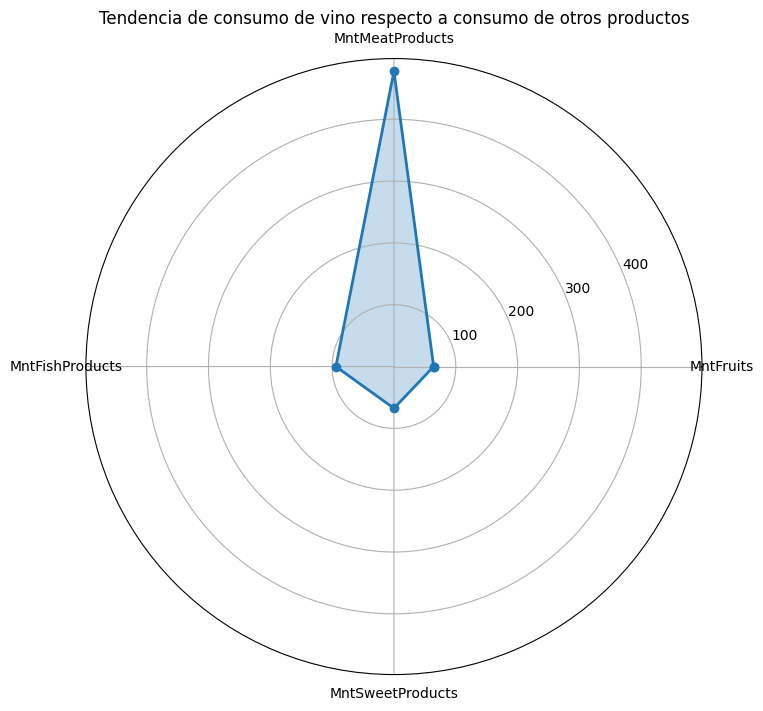

In [ ]:
#Graficamos el radar chart

def radar_chart(df, cluster_num):
    # Select data for the specified cluster
    cluster_data = df[df['cluster'] == cluster_num]

    # Prepare data for the radar chart
    categories = list(cluster_data.columns[1:])  # Exclude 'cluster' column
    values = cluster_data.iloc[0, 1:].values.flatten().tolist() # Get values for the cluster

    # Number of variables
    N = len(categories)

    # Create angles for the radar chart
    angles = [n / float(N) * 2 * 3.14159 for n in range(N)]
    angles += angles[:1]

    # Initialize the plot
    plt.figure(figsize=(8, 8))
    ax = plt.subplot(111, polar=True)

    # Plot data
    ax.plot(angles, values + values[:1], 'o-', linewidth=2)
    ax.fill(angles, values + values[:1], alpha=0.25)

    # Set labels and ticks
    ax.set_thetagrids(np.degrees(angles[:-1]), categories)
    plt.title('Tendencia de consumo de vino respecto a consumo de otros productos')

    plt.show()

radar_chart(cluster_means, Max_consumo_vino)

Con esto podemos concluir que gracias al modelo K_means se puede crear un perfil general de las características de los compradores de vino

## Aplicaciones del modelo (*KNN y K Means*)

Un ejemplo de aplicación de este modelo, sería crear una función que prediga si el grupo de clientes de un dataset comprará o no vino para marketing y publicidad personalizada

In [ ]:
#Primero se haría una limpieza de datos para que tenga sólo características numéricas
#Además las columnas deben estar en el mismo orden impuesto en el dataset anterior

def Compra_Vino(dataset):
  #Creamos la variable predicciones que contiene el modelo knn
  predicciones = knn.predict(dataset)
  dataset['Compra Vino'] = predicciones
  dataset['Compra Vino'] = dataset['Compra Vino'].replace({0: 'No', 1: 'Si'})
  return dataset

Ahora, este nuevo dataset tendrá una columna más que contiene la información de que si cada cliente compra vino o no